<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#通过邻接矩阵和关联矩阵创建网络" data-toc-modified-id="通过邻接矩阵和关联矩阵创建网络-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>通过邻接矩阵和关联矩阵创建网络</a></span><ul class="toc-item"><li><span><a href="#邻接矩阵" data-toc-modified-id="邻接矩阵-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>邻接矩阵</a></span><ul class="toc-item"><li><span><a href="#Pure-Python" data-toc-modified-id="Pure-Python-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Pure Python</a></span></li><li><span><a href="#使用-Numpy" data-toc-modified-id="使用-Numpy-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>使用 Numpy</a></span></li><li><span><a href="#使用-pandas" data-toc-modified-id="使用-pandas-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>使用 pandas</a></span></li><li><span><a href="#pandas-处理节点的属性" data-toc-modified-id="pandas-处理节点的属性-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>pandas 处理节点的属性</a></span></li></ul></li><li><span><a href="#关联矩阵" data-toc-modified-id="关联矩阵-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>关联矩阵</a></span><ul class="toc-item"><li><span><a href="#图-转换为-关联矩阵" data-toc-modified-id="图-转换为-关联矩阵-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>图 转换为 关联矩阵</a></span></li></ul></li></ul></li><li><span><a href="#使用边的列表创建网络" data-toc-modified-id="使用边的列表创建网络-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>使用边的列表创建网络</a></span></li><li><span><a href="#使用节点字典创建网络" data-toc-modified-id="使用节点字典创建网络-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用节点字典创建网络</a></span></li><li><span><a href="#创建人工网络" data-toc-modified-id="创建人工网络-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>创建人工网络</a></span><ul class="toc-item"><li><span><a href="#创建一些规则的网络" data-toc-modified-id="创建一些规则的网络-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>创建一些规则的网络</a></span></li><li><span><a href="#创建一些经典的网络" data-toc-modified-id="创建一些经典的网络-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>创建一些经典的网络</a></span></li><li><span><a href="#创建一些经典的社会网络" data-toc-modified-id="创建一些经典的社会网络-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>创建一些经典的社会网络</a></span></li></ul></li><li><span><a href="#处理有权网" data-toc-modified-id="处理有权网-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>处理有权网</a></span></li></ul></div>

* 复杂网络构建的时候很少一次添加一个节点或者一个连边，相反，都是直接从 矩阵数据， 连边列表， 节点字典，概率分布， 或者其他的数据结构。
 
* 掌握如何生成网络

# 通过邻接矩阵和关联矩阵创建网络

* 邻接矩阵 ： 描述节点和节点之间是否存在连边

* 关联矩阵： 节点和边之间是否存在联系，存在什么样的联系

## 邻接矩阵

* N x N 的矩阵： 行和列分别代表源节点和目标节点

* 不同类型的网络， 矩阵中的数值不同


![](https://i.loli.net/2019/10/23/PiaRDWBJehK1tuL.png)

###  Pure Python

* 使用列表嵌套表示

In [84]:
A = [[0, 1, 0, 0, 0], 
     [0, 0, 1, 0, 0], 
     [0, 0, 0, 1, 0], 
     [0, 0, 0, 0, 1],
     [1, 0, 0, 0, 0]]

In [85]:
import pprint as pp

> 这是一个有向图，因为邻接矩阵不对称

* 创建一个空的有向图， 之后遍历矩阵(有数值的点代表一个从 行节点到列节点存在连边)，向图添加连边。


In [86]:
from itertools import chain
import networkx as nx

G = nx.DiGraph()
edges = chain.from_iterable([(i, j) for j, column in enumerate(row) if A[i][j]]
                             for i, row in enumerate(A))

# 等价于
"""
edges= []
for  i , row in enumerate(A):
    for j ,column in enumerate(row):
        if A[i][j]:
            edges.append((i,j))
"""

G.add_edges_from(edges)
pp.pprint(list(G.edges(data = True)))

[(0, 1, {}), (1, 2, {}), (2, 3, {}), (3, 4, {}), (4, 0, {})]


> networkx 中默认边的权重是 1， 所以不作为属性展示 


> chain.from_iterable 创建一个迭代器，它首先返回第一个可迭代对象中所有元素，接着返回下一个可迭代对象中所有元素，直到耗尽所有可迭代对象中的元素。可将多个序列处理为单个序列。：

### 使用 Numpy

* 简洁， 高效 

* 使用矩阵代替列表嵌套

* 创建的时候需要指定网络类型

In [87]:
import numpy as np
A_mtx = np.matrix(A)
G = nx.from_numpy_matrix(A_mtx,create_using=nx.DiGraph())
pp.pprint(list(G.edges(data = True)))

[(0, 1, {'weight': 1}),
 (1, 2, {'weight': 1}),
 (2, 3, {'weight': 1}),
 (3, 4, {'weight': 1}),
 (4, 0, {'weight': 1})]


* 还可以将一个网络转换成一个 矩阵

In [88]:
B_mtx = nx.to_numpy_matrix(G)
print(B_mtx)

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


* 矩阵转换为列表

In [89]:
B_lst = B_mtx.tolist()
pp.pprint(B_lst)

[[0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 0.0]]


### 使用 pandas

* pandas 是和 NetworkX 之间最通用的连接方式

------


In [90]:
import pandas as pd

* 将 图转换为pandas 的数据格式 DataFrame

* 转换之前，我们先为每个节点加上 label



In [91]:
labels = "Born", "Married", "Elected Rep", "Elected Pres", "Died"
nx.relabel_nodes(G, dict(enumerate(labels)),copy = False)
df = nx.to_pandas_adjacency(G)
df


,Born,Married,Elected Rep,Elected Pres,Died
Born,0.0,1.0,0.0,0.0,0.0
Married,0.0,0.0,1.0,0.0,0.0
Elected Rep,0.0,0.0,0.0,1.0,0.0
Elected Pres,0.0,0.0,0.0,0.0,1.0
Died,1.0,0.0,0.0,0.0,0.0


* 将datafram 数据转换为 图

In [92]:
G_ = nx.from_pandas_adjacency(df)

In [93]:
pp.pprint(list(G_.edges(data=True)))

[('Born', 'Married', {'weight': 1.0}),
 ('Born', 'Died', {'weight': 1.0}),
 ('Married', 'Elected Rep', {'weight': 1.0}),
 ('Elected Rep', 'Elected Pres', {'weight': 1.0}),
 ('Elected Pres', 'Died', {'weight': 1.0})]


### pandas 处理节点的属性

In [94]:
events = {
    "Died": 1865,
    "Born": 1809,
    "Elected Rep": 1847,
    "Elected Pres": 1861,
    "Married": 1842
}
nx.set_node_attributes(G, events,"date" )
node_data = G.nodes(data=True)
pp.pprint(list(node_data))

[('Born', {'date': 1809}),
 ('Married', {'date': 1842}),
 ('Elected Rep', {'date': 1847}),
 ('Elected Pres', {'date': 1861}),
 ('Died', {'date': 1865})]


* 节点数据是一列 tuples， 

* 要做的就是从一列 tuples 中构建一个 DataFrame


In [95]:
pd.DataFrame(node_data)

,0,1
0,Born,{'date': 1809}
1,Married,{'date': 1842}
2,Elected Rep,{'date': 1847}
3,Elected Pres,{'date': 1861}
4,Died,{'date': 1865}


In [96]:
lincoln = pd.DataFrame(node_data).set_index(0)[1] # 将 0 所在的列设置为 index， 之后读取 1 所在的列
print(lincoln)

0
Born            {'date': 1809}
Married         {'date': 1842}
Elected Rep     {'date': 1847}
Elected Pres    {'date': 1861}
Died            {'date': 1865}
Name: 1, dtype: object


In [97]:
df = lincoln.apply(pd.Series)
df

,date
0,
Born,1809
Married,1842
Elected Rep,1847
Elected Pres,1861
Died,1865


* 已经将属性信息转换为 DataFrame 格式

-----

## 关联矩阵

* N x M 的矩阵， N个 node， M 个 edge

* $A[i][j] = 1 $ 意味着节点 i 和 边j 相连

* 如果是有向的网络， 节点是起始点就是 1， 目标点就是 -1

----

**相比与邻接矩阵， 关联矩阵很容易允许平行连边（两个节点之间多条连边）**

**但是不能表示有权的网络**


**占有更大的内存空间**

### 图 转换为 关联矩阵

In [98]:
J = nx.incidence_matrix(G) # 返回的是一个稀疏矩阵
print(J)

  (0, 0)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (0, 4)	1.0
  (4, 4)	1.0


In [99]:
J = J.todense() # 转换为密集矩阵
print(J)

[[1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1.]]


-------

# 使用边的列表创建网络

* 边的列表是一个 三元组的列表，包括： 起始节点，终止节点， 边属性的字典

* 可以从网络中获取这个列表

* 也可以通过这个列表创建网络

In [100]:
edges = nx.to_edgelist(G)
pp.pprint(list(edges))

[('Born', 'Married', {'weight': 1}),
 ('Married', 'Elected Rep', {'weight': 1}),
 ('Elected Rep', 'Elected Pres', {'weight': 1}),
 ('Elected Pres', 'Died', {'weight': 1}),
 ('Died', 'Born', {'weight': 1})]


In [101]:
F = nx.from_edgelist(edges)
pp.pprint(list(F.edges(data= True)))

[('Born', 'Married', {'weight': 1}),
 ('Born', 'Died', {'weight': 1}),
 ('Married', 'Elected Rep', {'weight': 1}),
 ('Elected Rep', 'Elected Pres', {'weight': 1}),
 ('Elected Pres', 'Died', {'weight': 1})]


# 使用节点字典创建网络

* 节点是 key， 相邻的节点是 value

* 通过图直接获取 节点的字典

In [102]:
dict_list = nx.to_dict_of_lists(G)
pp.pprint(dict_list)

{'Born': ['Married'],
 'Died': ['Born'],
 'Elected Pres': ['Died'],
 'Elected Rep': ['Elected Pres'],
 'Married': ['Elected Rep']}


> 观察发现，字典中没有保存连边的属性信息，因此不能直接反向创建原始的图

* 所以这种方法不太好用

------

# 创建人工网络


* NetworkX 中创建人工网络的方法是调用生成器(不同于 python 的生成器）

## 创建一些规则的网络

In [2]:
%matplotlib inline

/Users/liuchuang/anaconda3/envs/graph_network/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


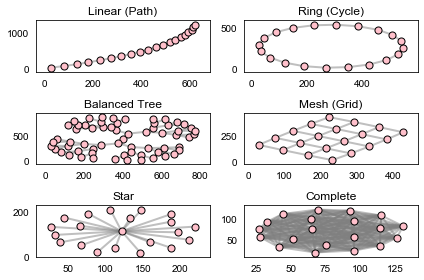

In [108]:
import re
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy

# Generate and draw classic networks
G0 = nx.    path_graph(20)
G1 = nx.   cycle_graph(20)
G4 = nx.    star_graph(20)
G5 = nx.complete_graph(20)
G2 = nx. balanced_tree(2, 5)
G3 = nx. grid_2d_graph(5, 4)
names = ("Linear (Path)", "Ring (Cycle)", "Balanced Tree", "Mesh (Grid)", 
         "Star", "Complete")
graphs = G0, G1, G2, G3, G4, G5
layouts = (graphviz_layout, ) * len(graphs)

for i, (g, name, layout) in  enumerate(zip(graphs, names, layouts)):
    ax = plt.subplot(3, 2, i + 1)
    pos = layout(g)
    nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax, **dzcnapy.small_attrs)
    nx.draw_networkx_nodes(g, pos, ax=ax, **dzcnapy.small_attrs)
    dzcnapy.set_extent(pos, ax, name)

dzcnapy.plot("synthetic3")

## 创建一些经典的网络

* Erdös–Rényi (really random), 
* Watts–Strogatz (small world), 
* Barabási–Albert (preferential attachment),
* Holme–Kim (enhanced preferential attachment) random graphs.

/Users/liuchuang/anaconda3/envs/graph_network/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


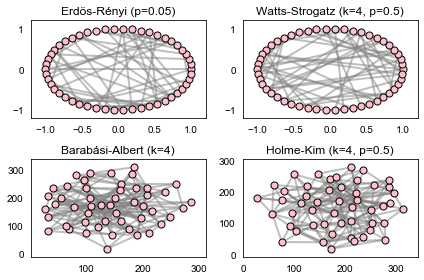

In [110]:
G0 = nx.             erdos_renyi_graph(50,    0.05)
G1 = nx.connected_watts_strogatz_graph(50, 4, 0.5 )
G2 = nx.         barabasi_albert_graph(50, 4      )
G3 = nx.        powerlaw_cluster_graph(50, 4, 0.5 )
names = ("Erdös-Rényi (p=0.05)", "Watts-Strogatz (k=4, p=0.5)", 
         "Barabási-Albert (k=4)", "Holme-Kim (k=4, p=0.5)")
graphs = G0, G1, G2, G3
layouts = (nx.circular_layout, nx.circular_layout,
           graphviz_layout, graphviz_layout)

for i, (g, name, layout) in  enumerate(zip(graphs, names, layouts)):
    ax = plt.subplot(2, 2, i + 1)
    pos = layout(g)
    nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax, **dzcnapy.small_attrs)
    nx.draw_networkx_nodes(g, pos, ax=ax, **dzcnapy.small_attrs)
    dzcnapy.set_extent(pos, ax, name)

dzcnapy.plot("synthetic1")


## 创建一些经典的社会网络

findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans.


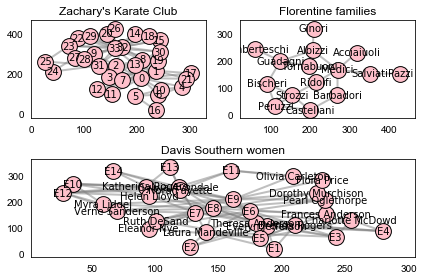

In [111]:
G0 = nx.karate_club_graph()
G1 = nx.davis_southern_women_graph()
G2 = nx.florentine_families_graph()
names = ("Zachary's Karate Club", "Davis Southern women", 
         "Florentine families")
graphs = G0, G1, G2
layouts = (graphviz_layout, graphviz_layout, graphviz_layout)
locations = (2, 2, 1), (2, 1, 2), (2, 2, 2)

for g, name, layout, loc in zip(graphs, names, layouts, locations):
    ax = plt.subplot(*loc)
    pos = layout(g)
    nx.draw_networkx_edges(g, pos, alpha=0.5, ax=ax, **dzcnapy.medium_attrs)
    nx.draw_networkx_nodes(g, pos, ax=ax, **dzcnapy.medium_attrs)
    nx.draw_networkx_labels(g, pos, ax=ax, **dzcnapy.medium_attrs)
    dzcnapy.set_extent(pos, ax, name)

dzcnapy.plot("synthetic2")

----

# 处理有权网

* 有权网络中一列连边较强，一些较弱

* 如果保留所有的连边， 将会得到一个扭曲的视图， 因为很多算法不区分连边的权重

* 所以需要进行一些切片操作（不同于python中的 slice， 这里是值消除弱连接）

* 设置一个阈值， 权重小于阈值的边，移除

In [22]:
ergraph = nx.             erdos_renyi_graph(50,    0.05)
nx.set_edge_attributes(ergraph,
                       {(n1, n2): random.random() for n1, n2
                        in ergraph.edges()}, "weight")
F = ergraph.copy()
edges = []
for n1, n2,w in F.edges(data=True):
    if tuple(w.values())[0] < 0.8:
        edges.append((n1,n2))
        #F.remove_edges_from([(n1, n2)])
        print(edges)

[(0, 15)]
[(0, 15), (0, 31)]
[(0, 15), (0, 31), (0, 38)]
[(0, 15), (0, 31), (0, 38), (1, 12)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5), (2, 13)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5), (2, 13), (2, 34)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5), (2, 13), (2, 34), (3, 15)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5), (2, 13), (2, 34), (3, 15), (3, 29)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27), (1, 32), (2, 4), (2, 5), (2, 13), (2, 34), (3, 15), (3, 29), (3, 49)]
[(0, 15), (0, 31), (0, 38), (1, 12), (1, 19), (1, 27),

In [24]:
F.remove_edges_from(edges)

In [26]:
print(F.edges(data= True))

[(0, 32, {'weight': 0.9342783981820196}), (0, 43, {'weight': 0.830158935349379}), (5, 24, {'weight': 0.9169924134579478}), (15, 19, {'weight': 0.8149561885369538}), (31, 40, {'weight': 0.879917602524765}), (32, 42, {'weight': 0.924104050895159})]
